In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
file = Path('coordinates/Membrane_2018June_Tomo26_CME_Invagination.txt')

In [1]:
from variation_relax import preprocess_mesh, relax_bending
from plot import plot_dots

## relaxation step ##
coords, original_coords = preprocess_mesh(file, resample_geometry=True, n_vertices=200)

params = {
    "Kb": 10,
    "Ksg": 10,
    "Ksl": 1.0,
    "dt": 1e-5,
    "n_iter": int(8e2),
    # "n_iter": int(8e4),
    # "boundary": "open",
    "boundary": "pinned",
}
relaxed_coords = relax_bending(coords, **params)

plot_dots(file.stem, original_coords, relaxed_coords)

# np.savez(
#     f"relaxed_coords/{file.stem}",
#     relaxed_coords=relaxed_coords,
#     original_coords=original_coords,
# )

# fig = plt.figure(figsize=(5, 5))
# plot_contour(
#     fig,
#     file.stem,
#     original_coords,
#     relaxed_coords,
# )
# fig.set_tight_layout(True)
# plt.savefig("relaxed_coords/" + file.stem + ".png")
# plt.show()
# fig.clear()
# plt.close(fig)

NameError: name 'file' is not defined

Energy relaxation:   0%|          | 0/100001 [00:00<?, ?it/s]

Parameters saved at figures/bcs_test/parameters.txt
Image saved at figures/bcs_test/plot_iter_000000.png
Image saved at figures/bcs_test/plot_iter_010000.png
Image saved at figures/bcs_test/plot_iter_020000.png
Image saved at figures/bcs_test/plot_iter_030000.png
Image saved at figures/bcs_test/plot_iter_040000.png
Image saved at figures/bcs_test/plot_iter_050000.png
Image saved at figures/bcs_test/plot_iter_060000.png
Image saved at figures/bcs_test/plot_iter_070000.png
Image saved at figures/bcs_test/plot_iter_080000.png
Image saved at figures/bcs_test/plot_iter_090000.png
Image saved at figures/bcs_test/plot_iter_100000.png
Movie saved at figures/bcs_test/simulation.mp4
[1.50051214e+00 5.00106013e+03 1.10215587e+00]
Energy plot saved at figures/bcs_test/energy_plot.png
Last coordinates saved at figures/bcs_test/relaxed_coords.npy


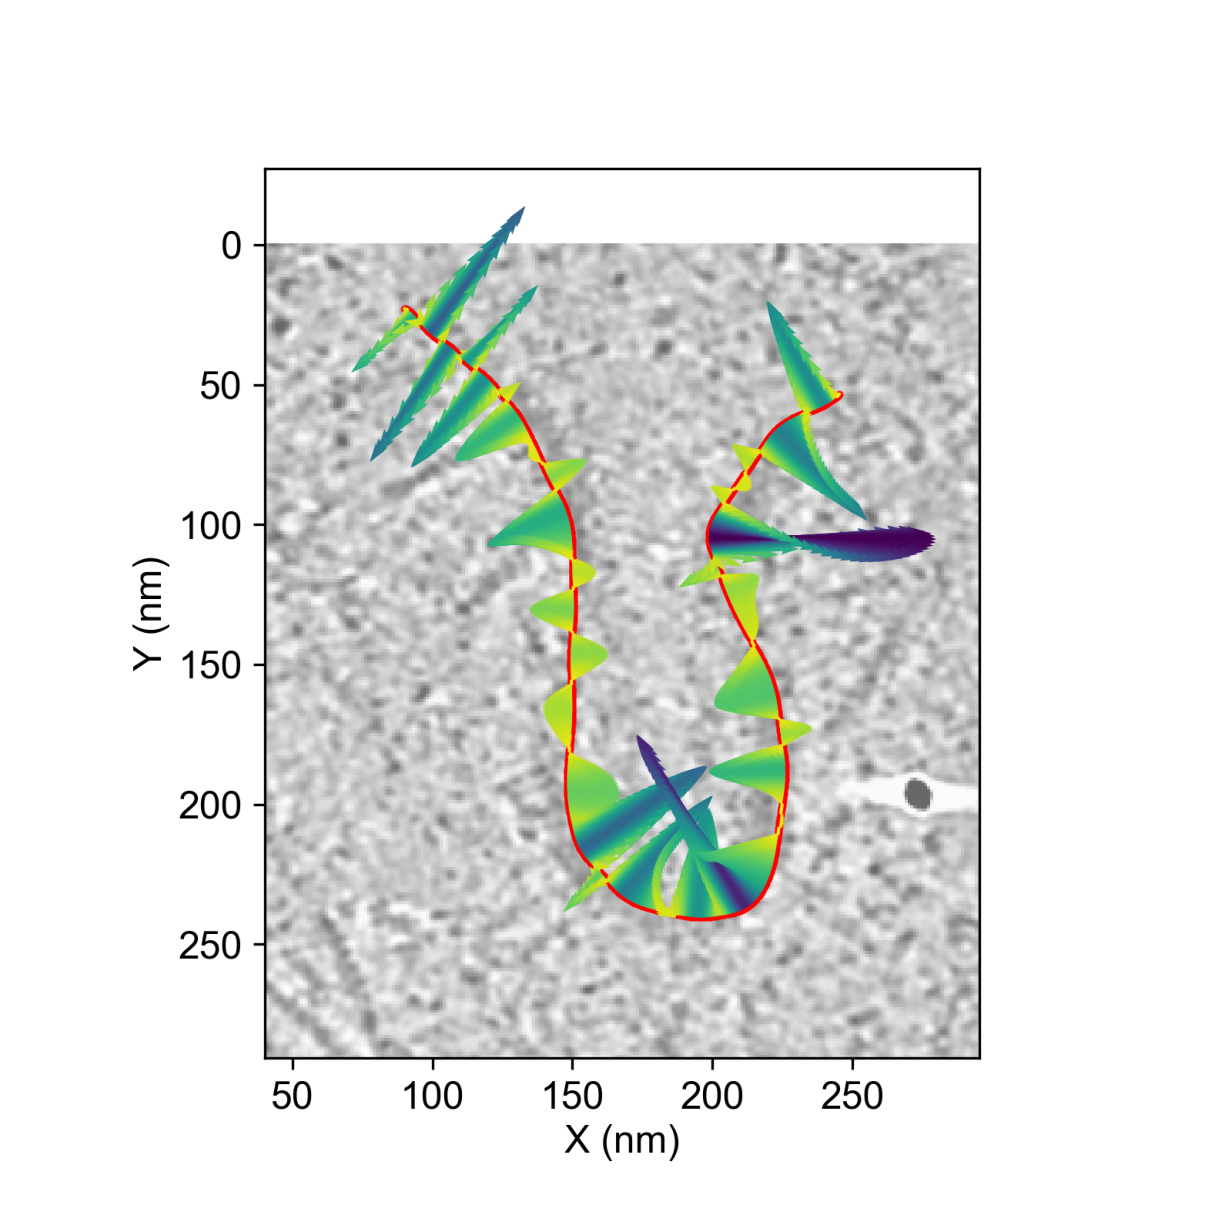

In [4]:
from variation_relax import preprocess_mesh
from bc_test import relax
from plot import plot_coord_force
from variation_run import get_force_density
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
file = Path('coordinates/Membrane_2018June_Tomo26_CME_Invagination.txt')

## relaxation step ##
coords, original_coords = preprocess_mesh(file, resample_geometry=True, n_vertices=200)

params = {
    # "Kb": 5.0,
    # "Ksg": 0.001,
    # "Ksl": 5.0,
    # "Kb": 5,
    # "Ksg": 0.1,
    # "Ksl": 10,
    "Kb": 10,
    "Ksg": 10,
    "Ksl": 10,
    "dt": 1e-5,
    # "n_iter": int(8e2),
    # "n_iter": int(8e4),
    "n_iter": int(1e5),
    # "boundary": "open",
    # "boundary": "pinned",
    "boundary": "fixed",
}
# relax(coords, file_stem = file.stem, **params, plot_interval = 10000, save_image=True, save_movie=True, save_energy=True)
relax(coords, file_stem = file.stem, **params, plot_interval = 10000, save_image=True, save_movie=True, save_energy=True, save_data=True)
# relax(coords, file_stem = file.stem, **params, plot_interval = 10000, save_data=True)



Figure saved as figures/bcs_test/summary_fixed_zero.png


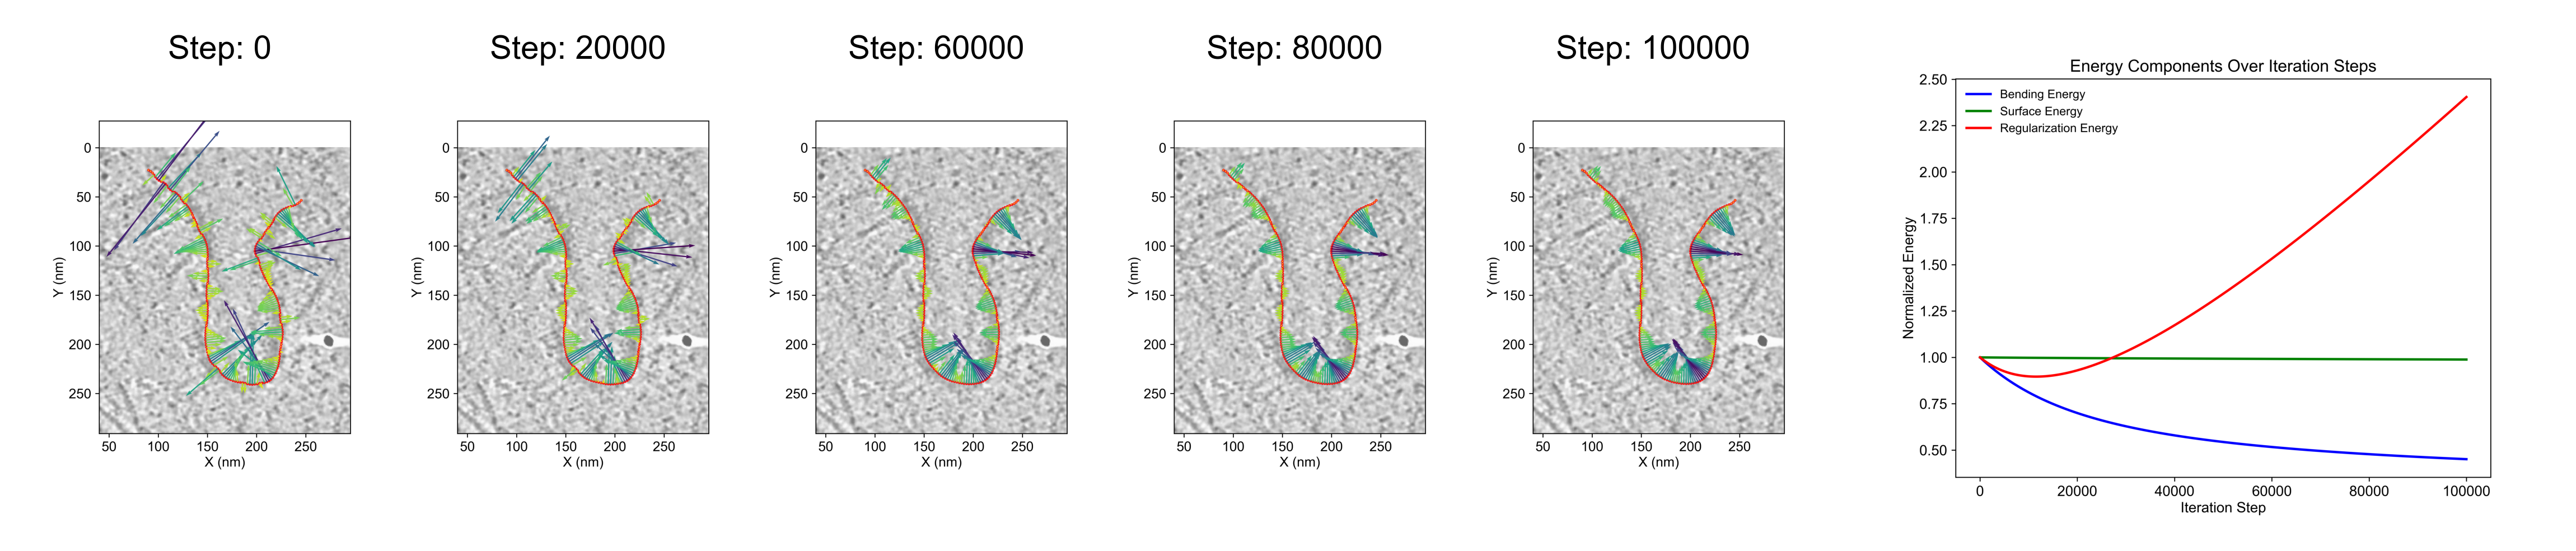

In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import matplotlib.gridspec as gridspec

# def display_saved_figures(image_dir, image_filenames, energy_plot_filename=None):
def display_saved_figures(image_dir, image_filenames, energy_plot_filename=None, boundary=None, edge=None, save_figure=False):
    total_figures = len(image_filenames) + (1 if energy_plot_filename else 0)
    data_dir = f"{image_dir}/bc_{boundary}_{edge}"
    
    # Create a grid with 1 row and `total_figures` columns using gridspec
    fig = plt.figure(figsize=(20, 4))
    gs = gridspec.GridSpec(1, total_figures, width_ratios=[1] * (total_figures - 1) + [2])

    # Loop through each filename and display the image in a subplot
    for idx, filename in enumerate(image_filenames):
        image_path = os.path.join(data_dir, filename)
        img = Image.open(image_path)

        ax = fig.add_subplot(gs[idx])
        ax.imshow(img)
        ax.axis('off')  # Hide axes for a cleaner look
        
        # Extract the time step from the filename (assuming the format "plot_iter_xxxxxx.png")
        timestep = int(filename.split('_')[-1].split('.')[0])
        ax.set_title(f"Step: {timestep}")

    # If there's an energy plot, add it as the last figure
    if energy_plot_filename:
        energy_path = os.path.join(data_dir, energy_plot_filename)
        energy_img = Image.open(energy_path)

        ax = fig.add_subplot(gs[-1])
        ax.imshow(energy_img)
        ax.axis('off')
        # ax.set_title("Energy Plot")

    # Adjust the layout to decrease the space between subplots
    plt.subplots_adjust(wspace=-0.1)  # Decrease this value to reduce space further


    if save_figure and boundary and edge:
        output_filename = f"summary_{boundary}_{edge}.png"
        output_path = os.path.join(image_dir, output_filename)
        plt.savefig(output_path, bbox_inches='tight')
        print(f"Figure saved as {output_path}")
    
    plt.show()

# Specify the directory where images are stored and the filenames you want to display

# boundary = "open"
# boundary = "pinned"
boundary = "fixed"

# edge = "reflect"
edge = "zero"

image_directory = f"figures/bcs_test"
# List of image filenames you want to display
image_files = [
    "plot_iter_000000.png",
    "plot_iter_020000.png",
    "plot_iter_060000.png",
    "plot_iter_080000.png",
    "plot_iter_100000.png"
]

# Specify the energy plot filename
energy_plot = "energy_plot.png"

display_saved_figures(image_directory, image_files, energy_plot_filename=energy_plot, boundary=boundary, edge=edge, save_figure=True)


Figure saved as figures/bcs_test/forces_bc_fixed_reflect.png


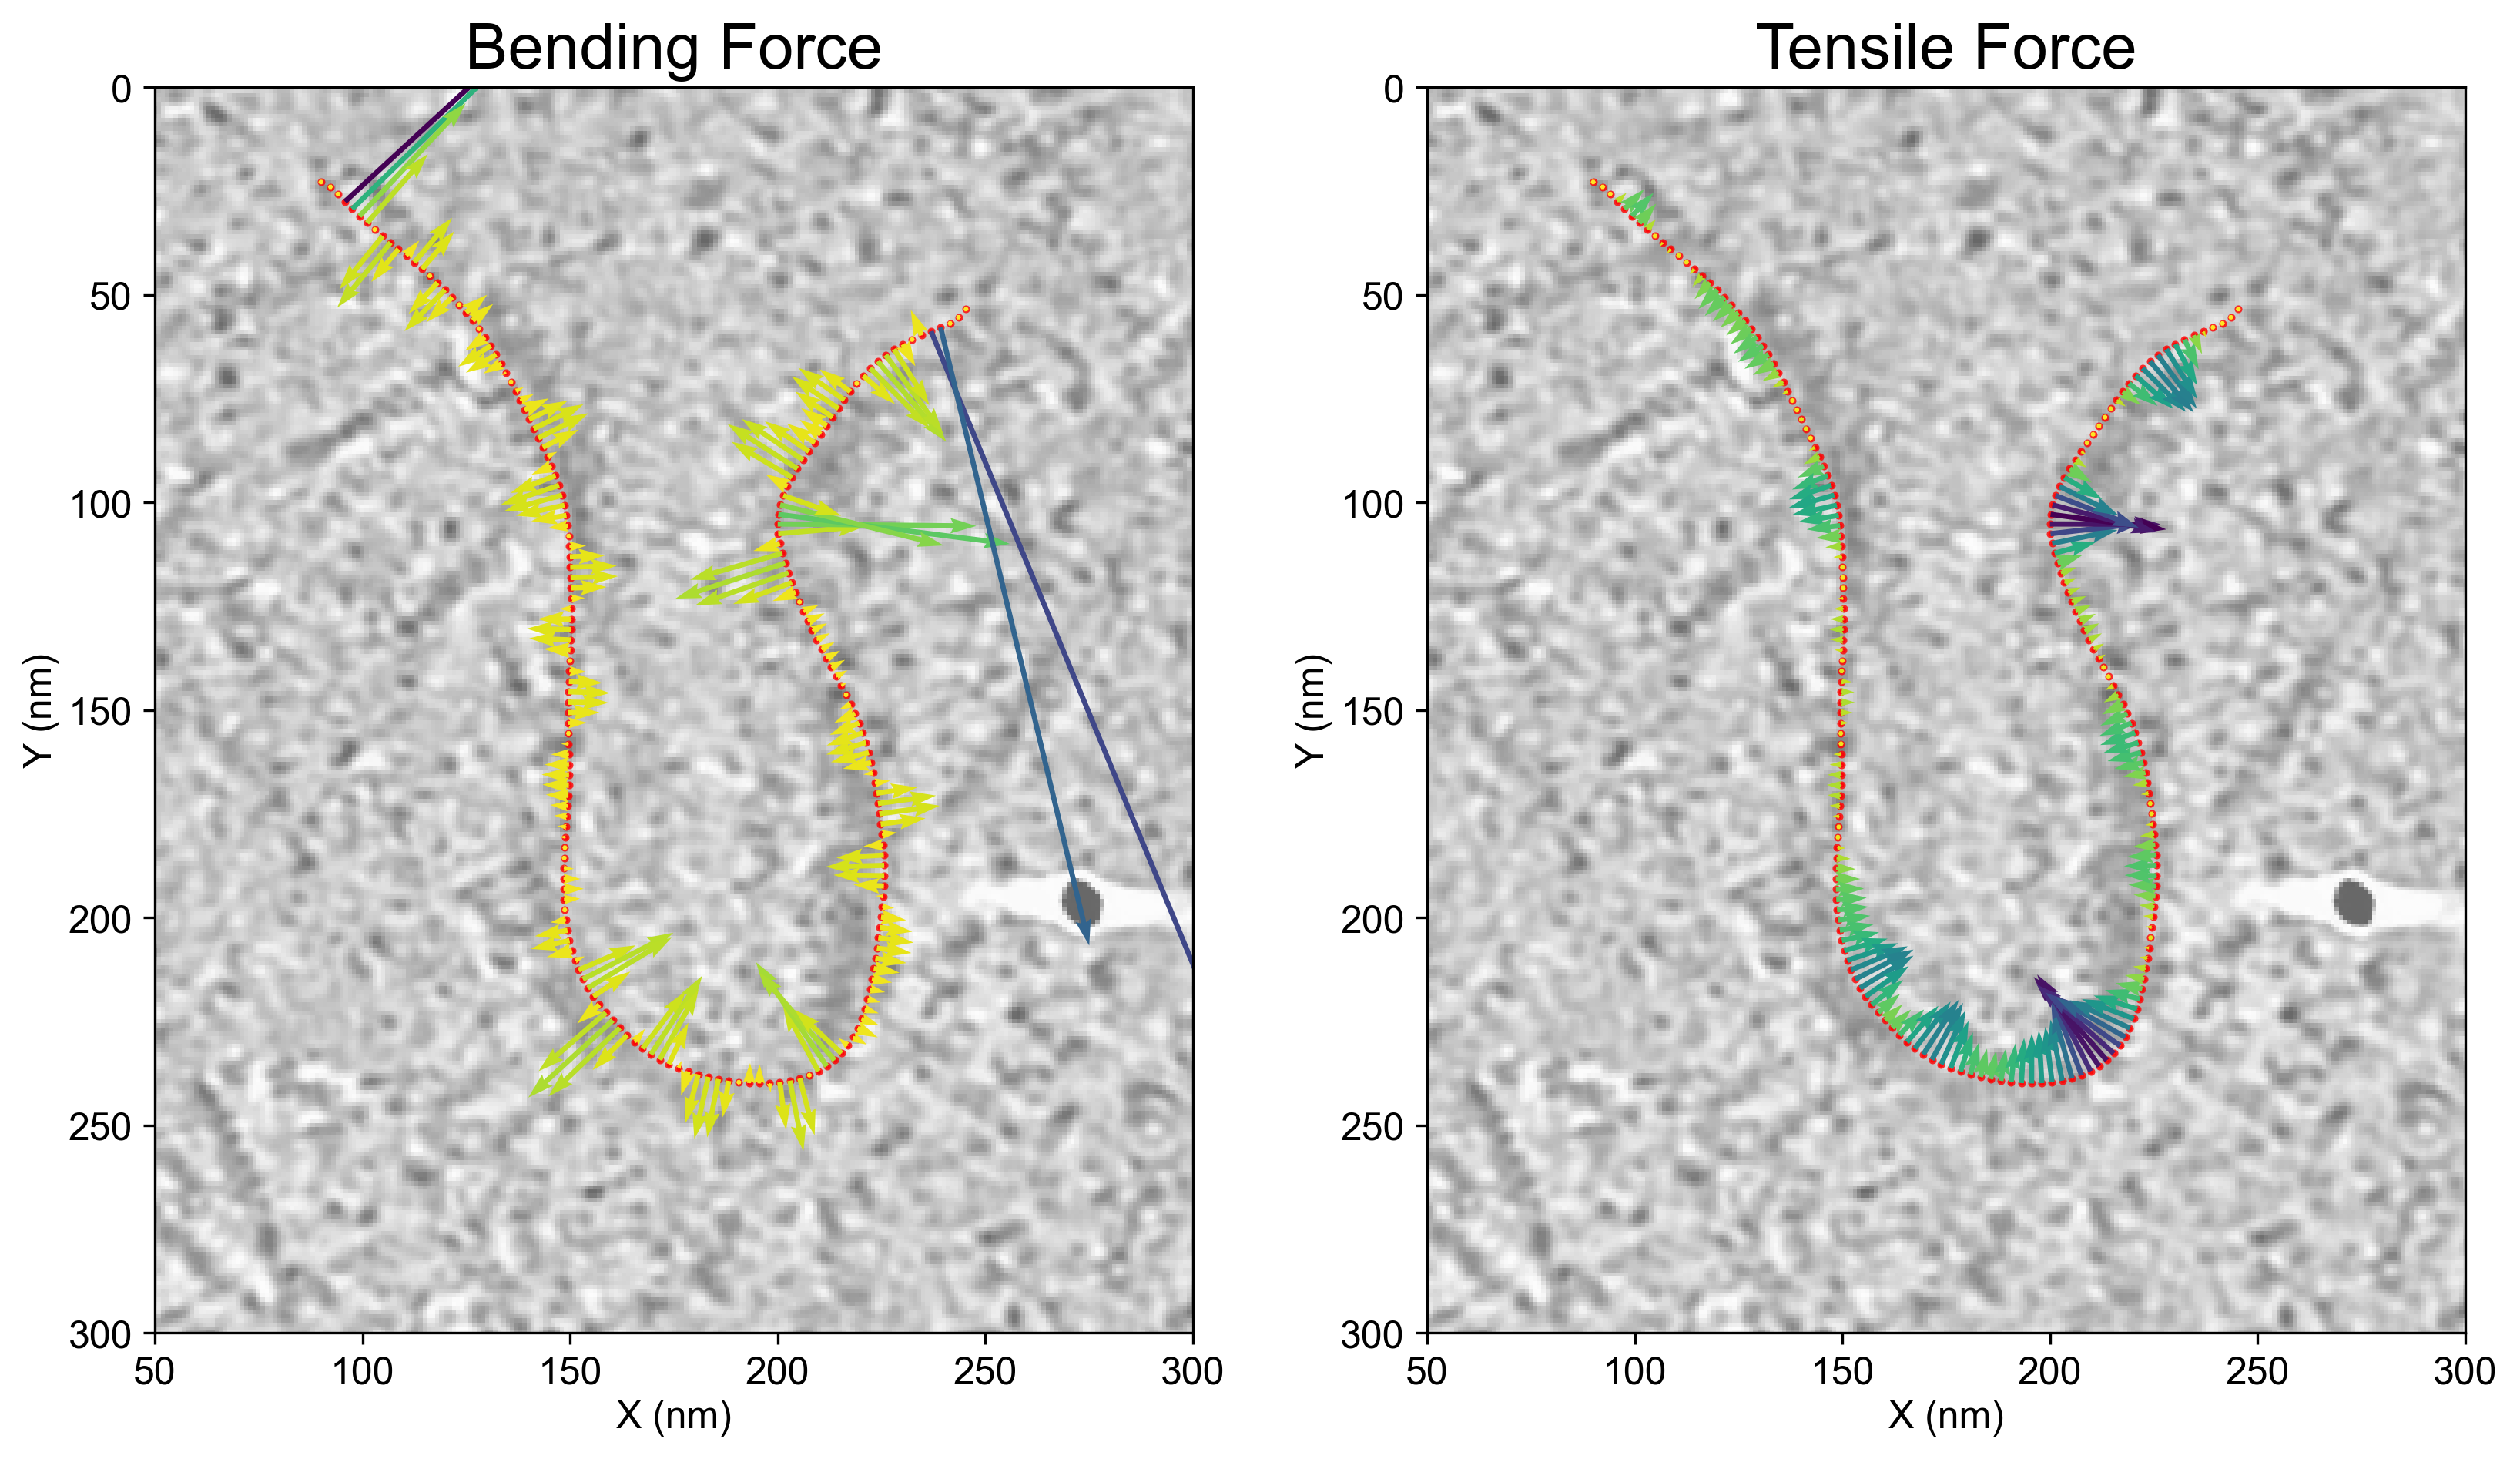

In [6]:
import numpy as np
from pathlib import Path
from variation_run import get_force_density
from plot import plot_coord_force, display_forces_side_by_side

file = Path('coordinates/Membrane_2018June_Tomo26_CME_Invagination.txt')

# boundary = "open"
# boundary = "pinned"
boundary = "fixed"

edge = "reflect"
# edge = "zero"

relaxed_coords = np.load(f"figures/bcs_test/bc_{boundary}_{edge}/relaxed_coords.npy")

parameters = {
    "Kb": 100/4,  # Bending modulus (pN um; original 1e-19 J)
    "Ksg": 0.5,  # Global stretching modulus (pN um/um^2; original 0.05 mN/m)
    "Ksl": 0,   # Regularization modulus (pN um; 0), 
    # "boundary": "open",
    # "boundary": "pinned",
    "boundary": "fixed"
}

forces = get_force_density(parameters, relaxed_coords)

# plot_coord_force(file.stem, relaxed_coords, forces[0,:], ylim=(300, 0), scale_factor=0.001)
# plot_coord_force(file.stem, relaxed_coords, forces[1,:], ylim=(300, 0), scale_factor=0.001)
# plot_coord_force(file.stem, relaxed_coords, forces[0,:] + forces[1,:], ylim=(300, 0), scale_factor=0.001)


display_forces_side_by_side(
    file.stem,
    relaxed_coords,
    forces,
    xlim=(50, 300),
    ylim=(300, 0),
    scale_factor=0.001,
    save=True,
    output_dir=f"figures/bcs_test",
    boundary=boundary,
    edge=edge
)

